In [107]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import torchvision
import matplotlib.pyplot as plt


In [96]:
BASE_DIR = './data/lego-minifigures'
PATH_INDEX = pd.read_csv('./data/lego-minifigures/index.csv')

In [97]:
config = {
    'test_size': 0.3,
    'img_size': 64,
    'batch_size': 32,
    'learning_rate': 1e-4
}

In [98]:
class LegoDataset(Dataset):
    def __init__(self, base_dir, path_index, transforms):
        self.data_path = base_dir
        self.path_index = path_index
        self.transforms = transforms

    def __len__(self):
        return len(self.path_index)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.data_path, self.path_index.iloc[index, 0])
        img = Image.open(img_path)

        img = self.transforms(img)

        return img, self.path_index.iloc[index, 1]
    


In [108]:
transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

train_paths, test_paths = train_test_split(PATH_INDEX, test_size=config['test_size'], random_state=42)

In [100]:
train_paths.reset_index(drop=True)

,path,class_id
0,marvel/0009/005.jpg,21
1,marvel/0002/010.jpg,2
2,star-wars/0016/004.jpg,37
3,star-wars/0004/004.jpg,8
4,harry-potter/0001/009.jpg,18
...,...,...
254,star-wars/0003/008.jpg,7
255,star-wars/0006/008.jpg,10
256,marvel/0014/003.jpg,28
257,star-wars/0015/007.jpg,36


In [101]:
train_dataset = LegoDataset(BASE_DIR, train_paths.reset_index(drop=True), transforms)
test_dataset = LegoDataset(BASE_DIR, test_paths.reset_index(drop=True), transforms)

In [102]:
len(test_dataset)

112

In [103]:
train_dataloader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size = config['batch_size'], shuffle=False)

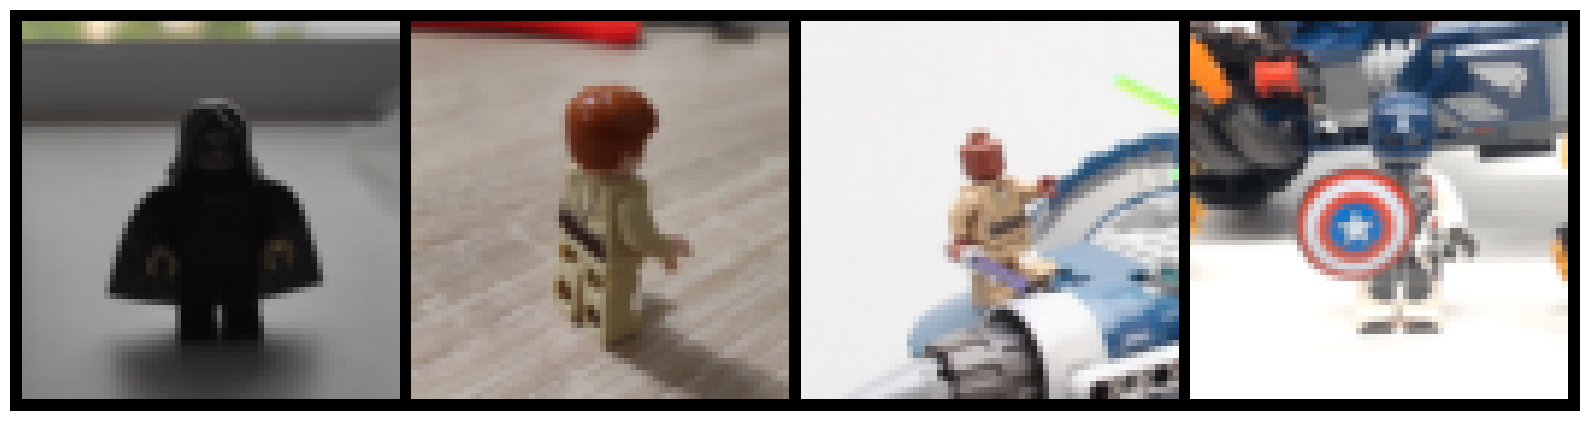

In [106]:
samples, labels = next(iter(train_dataloader))
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples[:4])
np_grid_imgs = grid_imgs.numpy()
plt.imshow(np.transpose(np_grid_imgs, (1,2,0)))
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self, input_size):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, stride=(1, 1), kernel_size=(3, 3), padding=1),
            nn.LeakyReLU(0.01),
            nn.Conv2d(32, 64, stride=(2, 2), kernel_size=(5, 5), padding=2),
            nn.LeakyReLU(0.01),
            nn.Conv2d(64, 64, stride=(2, 2), kernel_size=(5, 5), padding=2),
            nn.LeakyReLU(0.01),
            nn.Conv2d(64, 64, stride=(2, 2), kernel_size=(5, 5), padding=2),
            nn.Flatten(),
            nn.Linear(4096, 16)
        )

        self.decoder = nn.Sequential(
            nn.Linear(16, 4096),
            nn.Unflatten(1, (64, 8 , 8))
        )
